In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, sklearn, collections, itertools, math, functools, sys

%matplotlib inline
from matplotlib import pyplot
matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)

from sklearn import preprocessing

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)

pandas.set_option('display.max_columns', 500)


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

In [2]:
df = pandas.read_csv("../data/sources.extended.csv", index_col="source_id")
df = df.ix[~pandas.isnull(df.mutations)]
#df = df.ix[df.paired]
df

Unnamed: 0     index     donor cohort library treated  \
source_id                                                                     
AOCS-001-1/SP101515            0  SP101515  AOCS-001   AOCS     WGS   False   
AOCS-002-1/SP101517            1  SP101517  AOCS-002   AOCS     WGS   False   
AOCS-004-1/SP101519            2  SP101519  AOCS-004   AOCS     WGS   False   
AOCS-005-1/SP101521            3  SP101521  AOCS-005   AOCS     WGS   False   
AOCS-034-13/SP101524           4  SP101524  AOCS-034   AOCS     WGS    True   
AOCS-034-1/SP101523            5  SP101523  AOCS-034   AOCS     WGS   False   
AOCS-055-1/SP101526            6  SP101526  AOCS-055   AOCS     WGS   False   
AOCS-056-1/SP101528            7  SP101528  AOCS-056   AOCS     WGS   False   
AOCS-057-1/SP101530            8  SP101530  AOCS-057   AOCS     WGS   False   
AOCS-058-1/SP101532            9  SP101532  AOCS-058   AOCS     WGS   False   
AOCS-059-1/SP101536           10  SP101536  AOCS-059   AOCS     WGS   False   
AOCS-060-1/SP101540           11  SP101540  AOCS-060   AOCS     WGS   False   
AOCS-061-1/SP101544           12  SP101544  AOCS-061   AOCS     WGS   False   
AOCS-063-1/SP101548           13  SP101548  AOCS-063   AOCS     WGS   False   
AOCS-064-13/SP101554          14  SP101554  AOCS-064   AOCS     WGS    True   
AOCS-064-1/SP101552           15  SP101552  AOCS-064   AOCS     WGS   False   
AOCS-065-13/SP101560          16  SP101560  AOCS-065   AOCS     WGS    True   
AOCS-065-1/SP101558           17  SP101558  AOCS-065   AOCS     WGS   False   
AOCS-075-1/SP101564           18  SP101564  AOCS-075   AOCS     WGS   False   
AOCS-076-1/SP101568           19  SP101568  AOCS-076   AOCS     WGS   False   
AOCS-077-1/SP101572           20  SP101572  AOCS-077   AOCS     WGS    True   
AOCS-078-1/SP101576           21  SP101576  AOCS-078   AOCS     WGS   False   
AOCS-079-1/SP101580           22  SP101580  AOCS-079   AOCS     WGS   False   
AOCS-080-1/SP101584           23  SP101584  AOCS-080   AOCS     WGS   False   
AOCS-081-1/SP101588           24  SP101588  AOCS-081   AOCS     WGS   False   
AOCS-083-1/SP101592           25  SP101592  AOCS-083   AOCS     WGS   False   
AOCS-084-1/SP101596           26  SP101596  AOCS-084   AOCS     WGS   False   
AOCS-085-1/SP101600           27  SP101600  AOCS-085   AOCS     WGS   False   
AOCS-086-1/SP101604           28  SP101604  AOCS-086   AOCS     WGS   False   
AOCS-086-13/SP101606          29  SP101606  AOCS-086   AOCS     WGS    True   
...                          ...       ...       ...    ...     ...     ...   
AOCS-144-1/SP101951           86  SP101951  AOCS-144   AOCS     WGS   False   
AOCS-145-1/SP101961           87  SP101961  AOCS-145   AOCS     WGS   False   
AOCS-146-1/SP101971           88  SP101971  AOCS-146   AOCS     WGS   False   
AOCS-147-1/SP101981           89  SP101981  AOCS-147   AOCS     WGS   False   
AOCS-148-1/SP101990           90  SP101990  AOCS-148   AOCS     WGS   False   
AOCS-149-1/SP102000           91  SP102000  AOCS-149   AOCS     WGS   False   
AOCS-150-13/SP102010          92  SP102010  AOCS-150   AOCS     WGS    True   
AOCS-150-14/SP102015          93  SP102015  AOCS-150   AOCS     WGS    True   
AOCS-152-1/SP102025           94  SP102025  AOCS-152   AOCS     WGS   False   
AOCS-153-1/SP102035           95  SP102035  AOCS-153   AOCS     WGS   False   
AOCS-155-13/SP102045          96  SP102045  AOCS-155   AOCS     WGS    True   
AOCS-157-1/SP102055           97  SP102055  AOCS-157   AOCS     WGS   False   
AOCS-158-1/SP102064           98  SP102064  AOCS-158   AOCS     WGS    True   
AOCS-159-1/SP102074           99  SP102074  AOCS-159   AOCS     WGS   False   
AOCS-160-1/SP102084          100  SP102084  AOCS-160   AOCS     WGS   False   
AOCS-161-1/SP102090          101  SP102090  AOCS-161   AOCS     WGS   False   
AOCS-162-1/SP102096          102  SP102096  AOCS-162   AOCS     WGS    True   
AOCS-163-1/SP102103          103  SP102103  AOCS-163   AOCS     WGS   Fa

In [3]:
df.describe()

/hpc/users/burosj01/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Unnamed: 0  interval_days  protein changing    peptides  \
count  115.000000     115.000000        115.000000  115.000000   
mean    57.721739     341.539130         78.043478  213.852174   
std     33.692247     640.075013         44.584710  168.984440   
min      0.000000     -23.000000         11.000000   27.000000   
25%     28.500000       0.000000         49.500000  100.000000   
50%     58.000000       0.000000         67.000000  168.000000   
75%     86.500000     452.500000        101.500000  273.000000   
max    115.000000    2897.000000        310.000000  955.000000   

       expressed peptides     mutations  mutations_per_mb       indel  \
count           98.000000    115.000000        115.000000  115.000000   
mean            84.714286   9558.121739          3.183918    4.834783   
std             71.141213   5342.984983          1.779808    4.086629   
min              5.000000   1532.000000          0.510326    0.000000   
25%                   NaN   6244.500000          2.080113    2.000000   
50%                   NaN   8057.000000          2.683877    4.000000   
75%                   NaN  12286.000000          4.092605    7.000000   
max            449.000000  39325.000000         13.099600   19.000000   

       interesting mutations  fraction_peptides_expressed  specimen_interval  \
count             115.000000                    98.000000         115.000000   
mean               19.232644                     0.421168         341.539130   
std                 2.907448                     0.154860         640.075013   
min                 6.761602                     0.053333         -23.000000   
25%                17.533760                          NaN           0.000000   
50%                19.267355                          NaN           0.000000   
75%                20.787690                          NaN         452.500000   
max                33.961965                     0.807692        2897.000000   

       tumour_grade  percentage_cellularity  
count     81.000000              106.000000  
mean       2.814815               84.235849  
std        0.390868               10.821101  
min        2.000000               50.000000  
25%             NaN                     NaN  
50%             NaN                     NaN  
75%             NaN                     NaN  
max        3.000000              100.000000

In [4]:
predicted = ["mutations", "peptides", "expressed peptides"]

# donor is handled specially
predictors = [
    "treated",
    "timepoint",
#    "metastasis",
#    "specimen_interval",
    "tissue_type",
#    "tumour_grade",
#    "tumour_stage",
    "percentage_cellularity",
]

## data exploration

### mutation count by timing/treatment

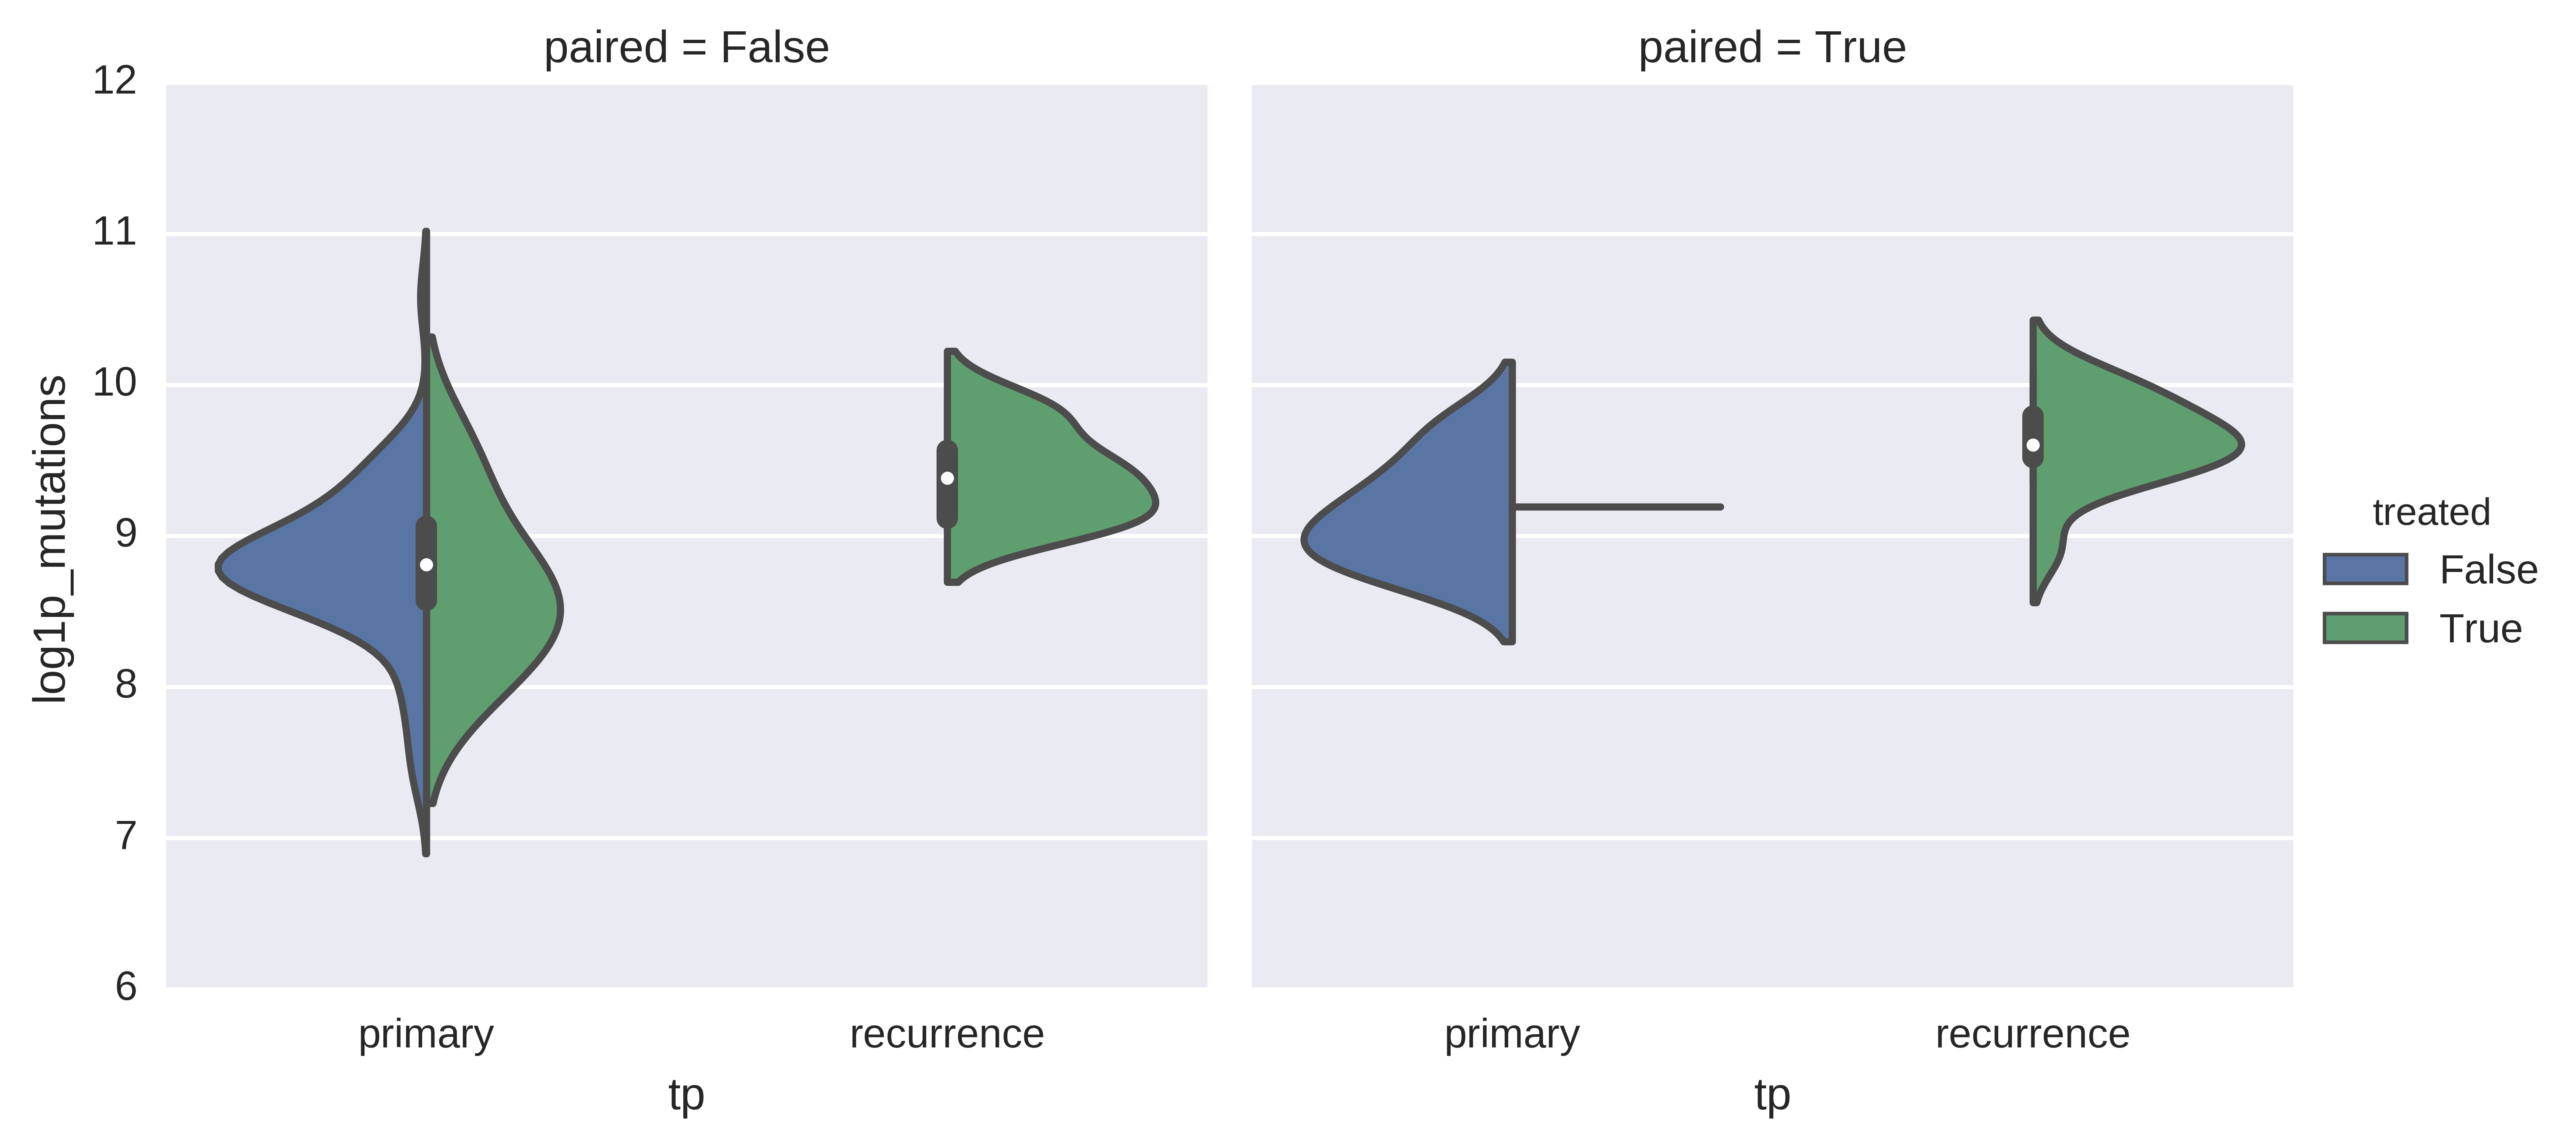

In [5]:
df['tp'] = df.timepoint.astype('category')
df['log1p_mutations'] = numpy.log1p(df.mutations)

#df['trt'] = df.treatment.astype('category')
seaborn.factorplot(data = df,
                   x = 'tp', y = 'log1p_mutations',
                   hue = 'treated',
                   kind = 'violin',
                   split = True,
                   col = 'paired'
                  )


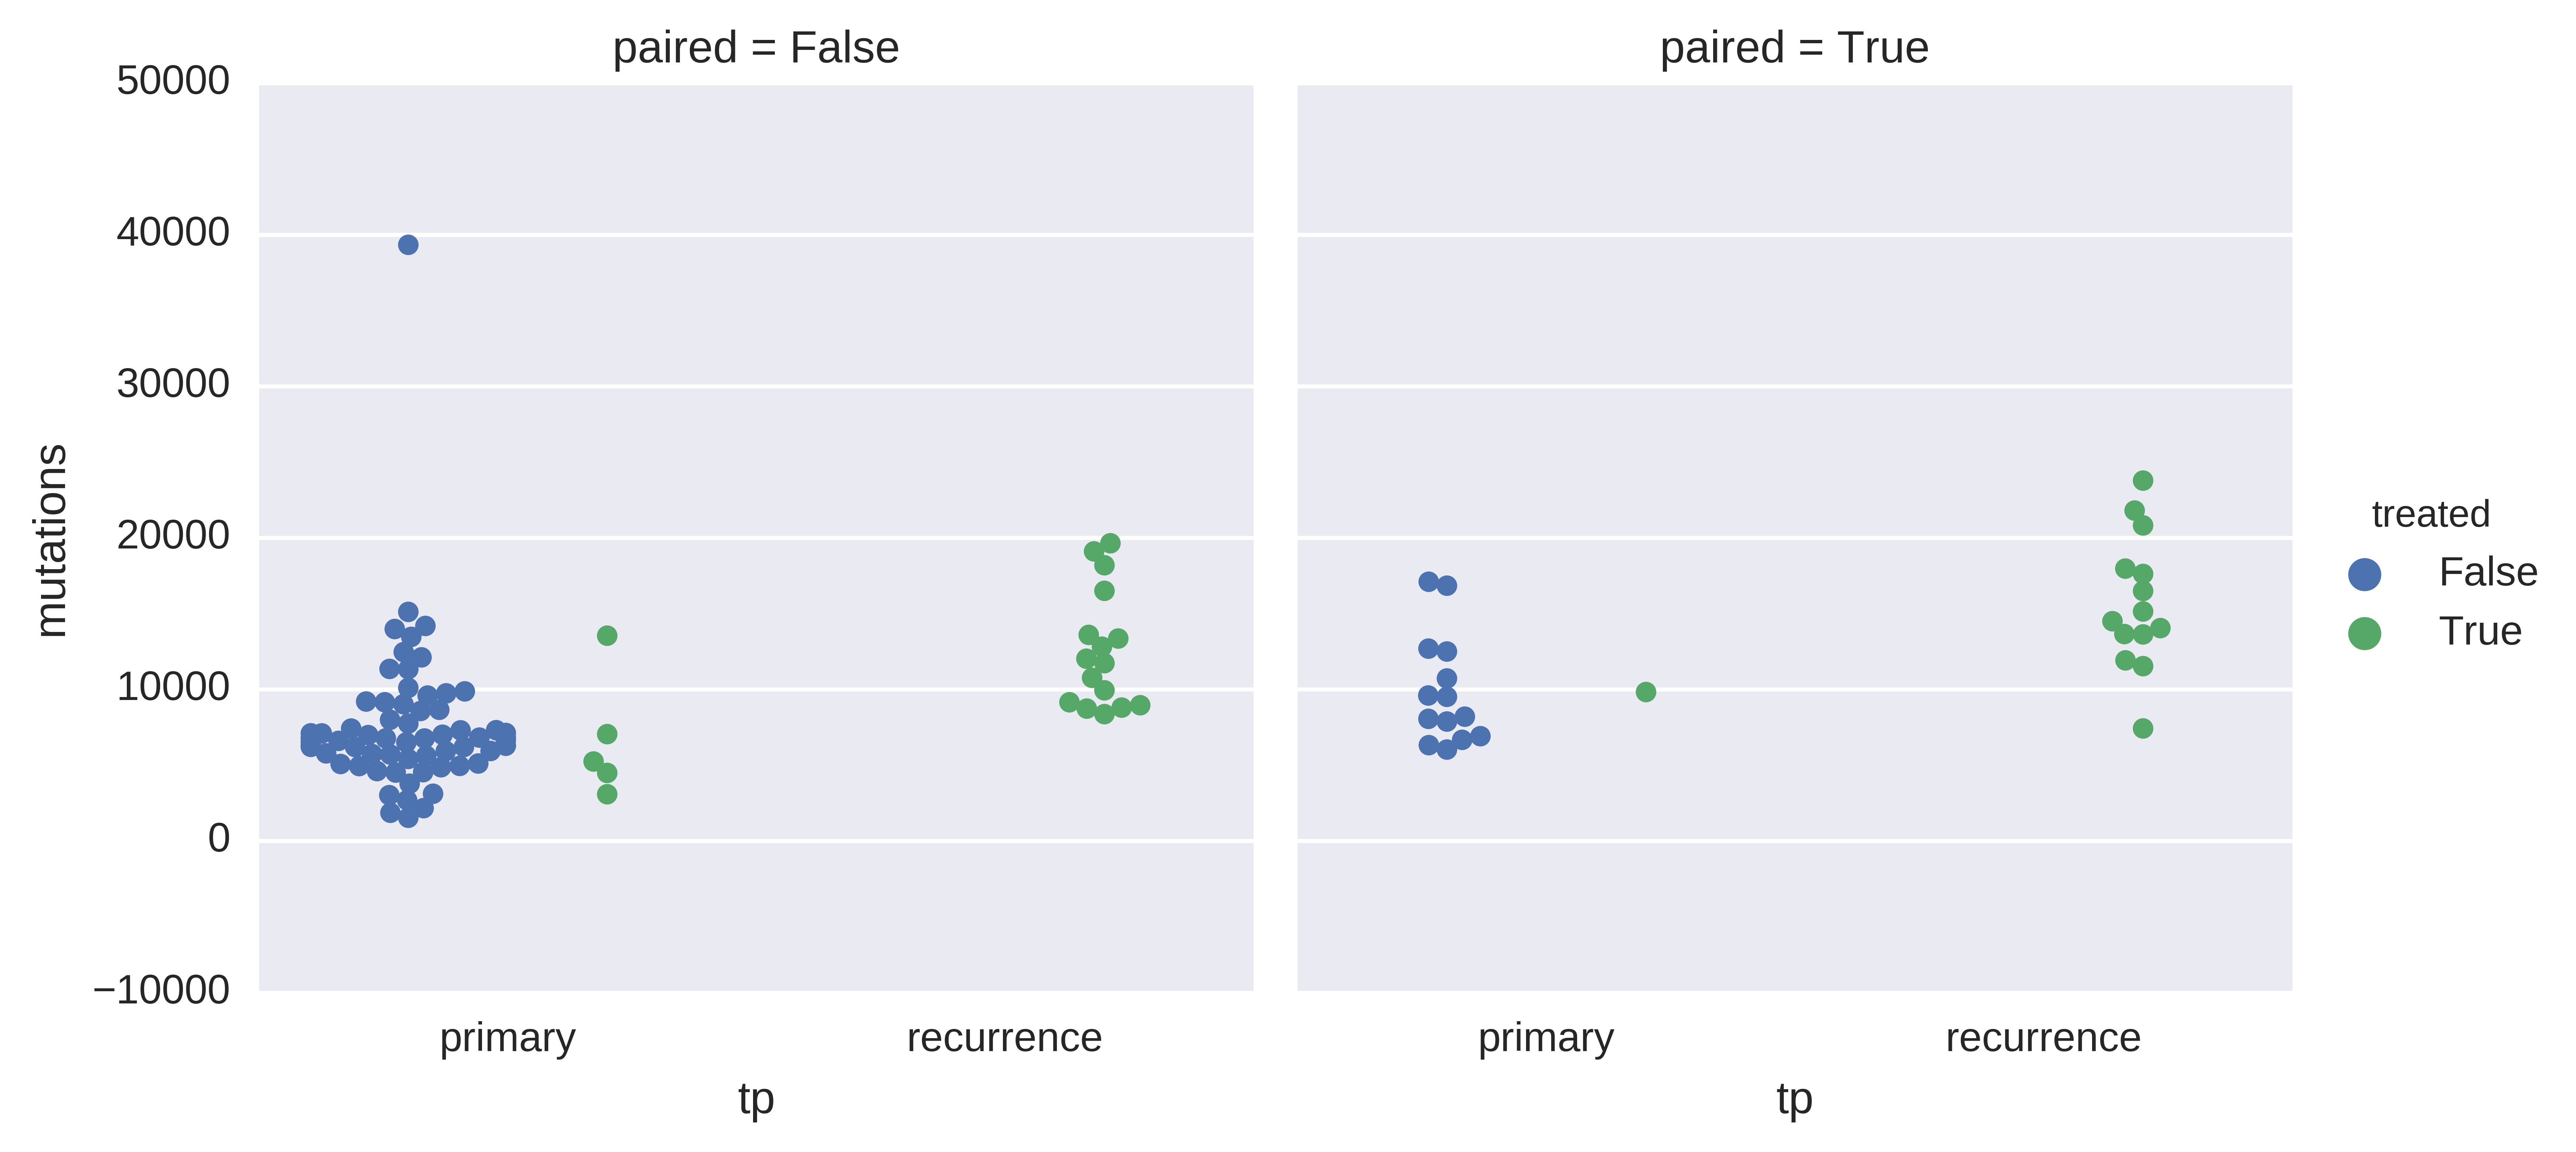

In [6]:
seaborn.factorplot(data = df,
                   x = 'tp', y = 'mutations',
                   hue = 'treated',
                   kind = 'swarm',
                   split = True,
                   col = 'paired'
                  )


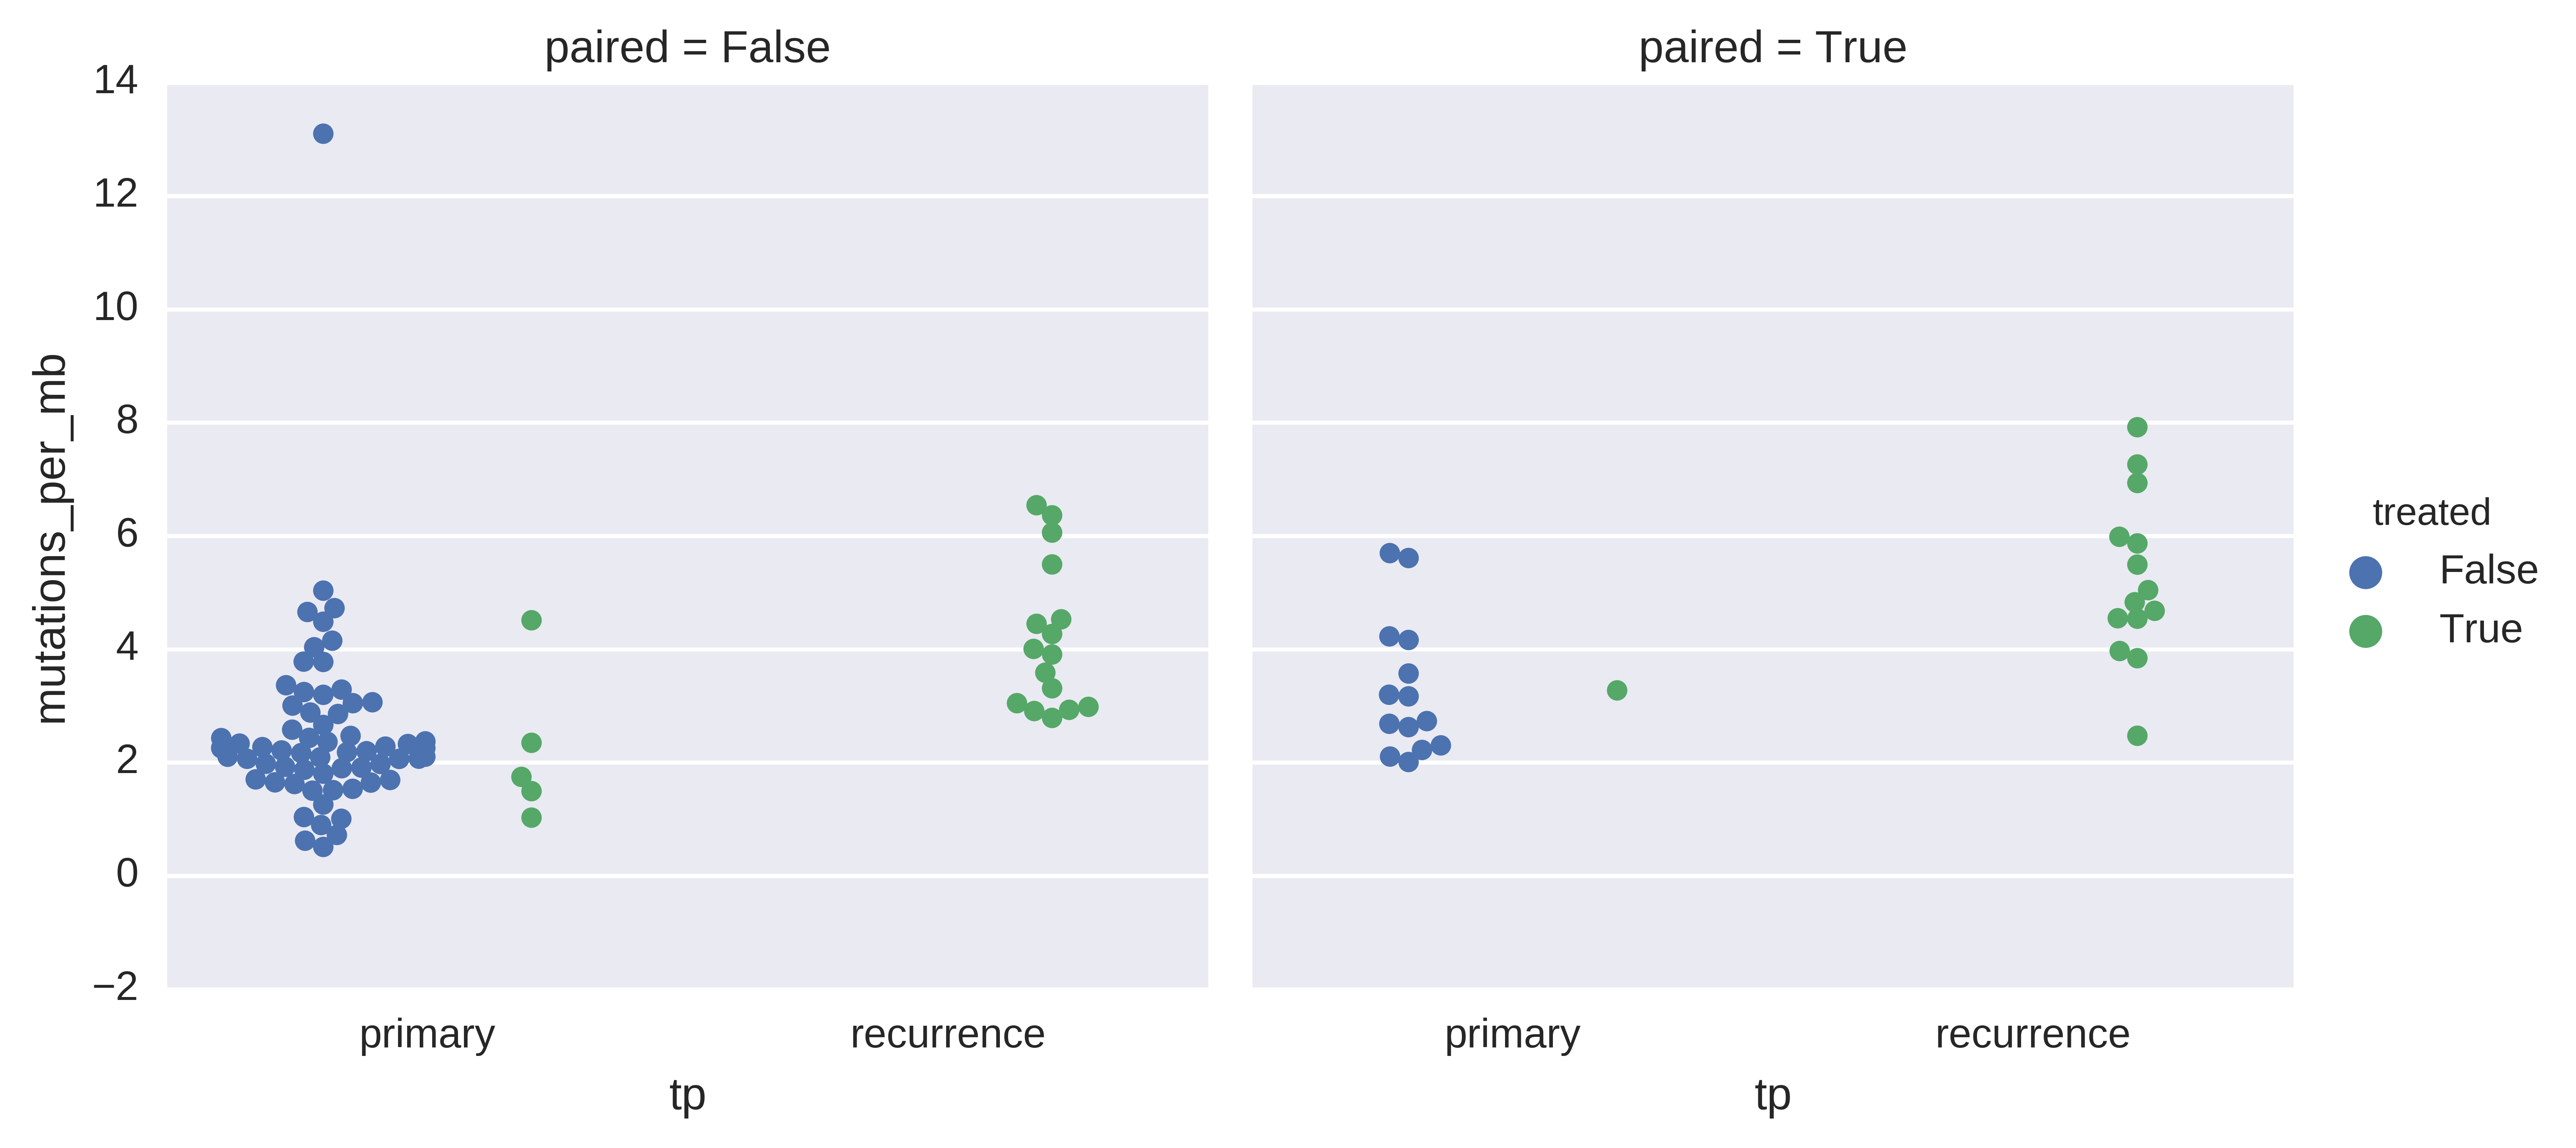

In [7]:

seaborn.factorplot(data = df,
                   x = 'tp', y = 'mutations_per_mb',
                   hue = 'treated',
                   kind = 'swarm',
                   split = True,
                   col = 'paired'
                  )


In [8]:
## who is the one patient with mutation count of 40k?
df.query('mutations > 30000').head()

Unnamed: 0     index     donor cohort library treated  \
source_id                                                                    
AOCS-166-1/SP102133         106  SP102133  AOCS-166   AOCS     WGS   False   

                    timepoint metastasis tissue_type  interval_days assay  \
source_id                                                                   
AOCS-166-1/SP102133   primary      False       solid            0.0   WGS   

                    paired timepoint_paired  protein changing  peptides  \
source_id                                                                 
AOCS-166-1/SP102133  False            False             310.0     954.0   

                     expressed peptides  mutations  mutations_per_mb  indel  \
source_id                                                                     
AOCS-166-1/SP102133               449.0    39325.0           13.0996    9.0   

                     interesting mutations       group        treatment  \
source_id                                                                 
AOCS-166-1/SP102133               6.761602  AOCS solid  treatment naive   

                     fraction_peptides_expressed project_code  \
source_id                                                       
AOCS-166-1/SP102133                      0.47065        OV-AU   

                    study_specimen_involved_in submitted_specimen_id  \
source_id                                                              
AOCS-166-1/SP102133                      PCAWG            AOCS-166-1   

                    icgc_donor_id submitted_donor_id  \
source_id                                              
AOCS-166-1/SP102133       DO46591           AOCS-166   

                                     specimen_type specimen_type_other  \
source_id                                                                
AOCS-166-1/SP102133  Primary tumour - solid tissue                 NaN   

                     specimen_interval specimen_donor_treatment_type  \
source_id                                                              
AOCS-166-1/SP102133                  0                  no treatment   

                    specimen_donor_treatment_type_other specimen_processing  \
source_id                                                                     
AOCS-166-1/SP102133                                 NaN               fresh   

                        specimen_storage tumour_confirmed  \
source_id                                                   
AOCS-166-1/SP102133  frozen, vapor phase               no   

                    tumour_histological_type tumour_grading_system  \
source_id                                                            
AOCS-166-1/SP102133                   8441/3            Silverberg   

                     tumour_grade tumour_stage_system tumour_stage  \
source_id                                                            
AOCS-166-1/SP102133           2.0                FIGO          III   

                     percentage_cellularity level_of_cellularity       tp  \
source_id                                                                   
AOCS-166-1/SP102133                    91.0                 >81%  primary   

                     log1p_mutations  
source_id                             
AOCS-166-1/SP102133        10.579641

In [9]:
len(df.mutations)

115

In [10]:
## let's exclude this patient for now; may exert too much influence over our data 
df = df.drop(df[df.mutations > 30000].index).copy()
len(df.mutations)

114

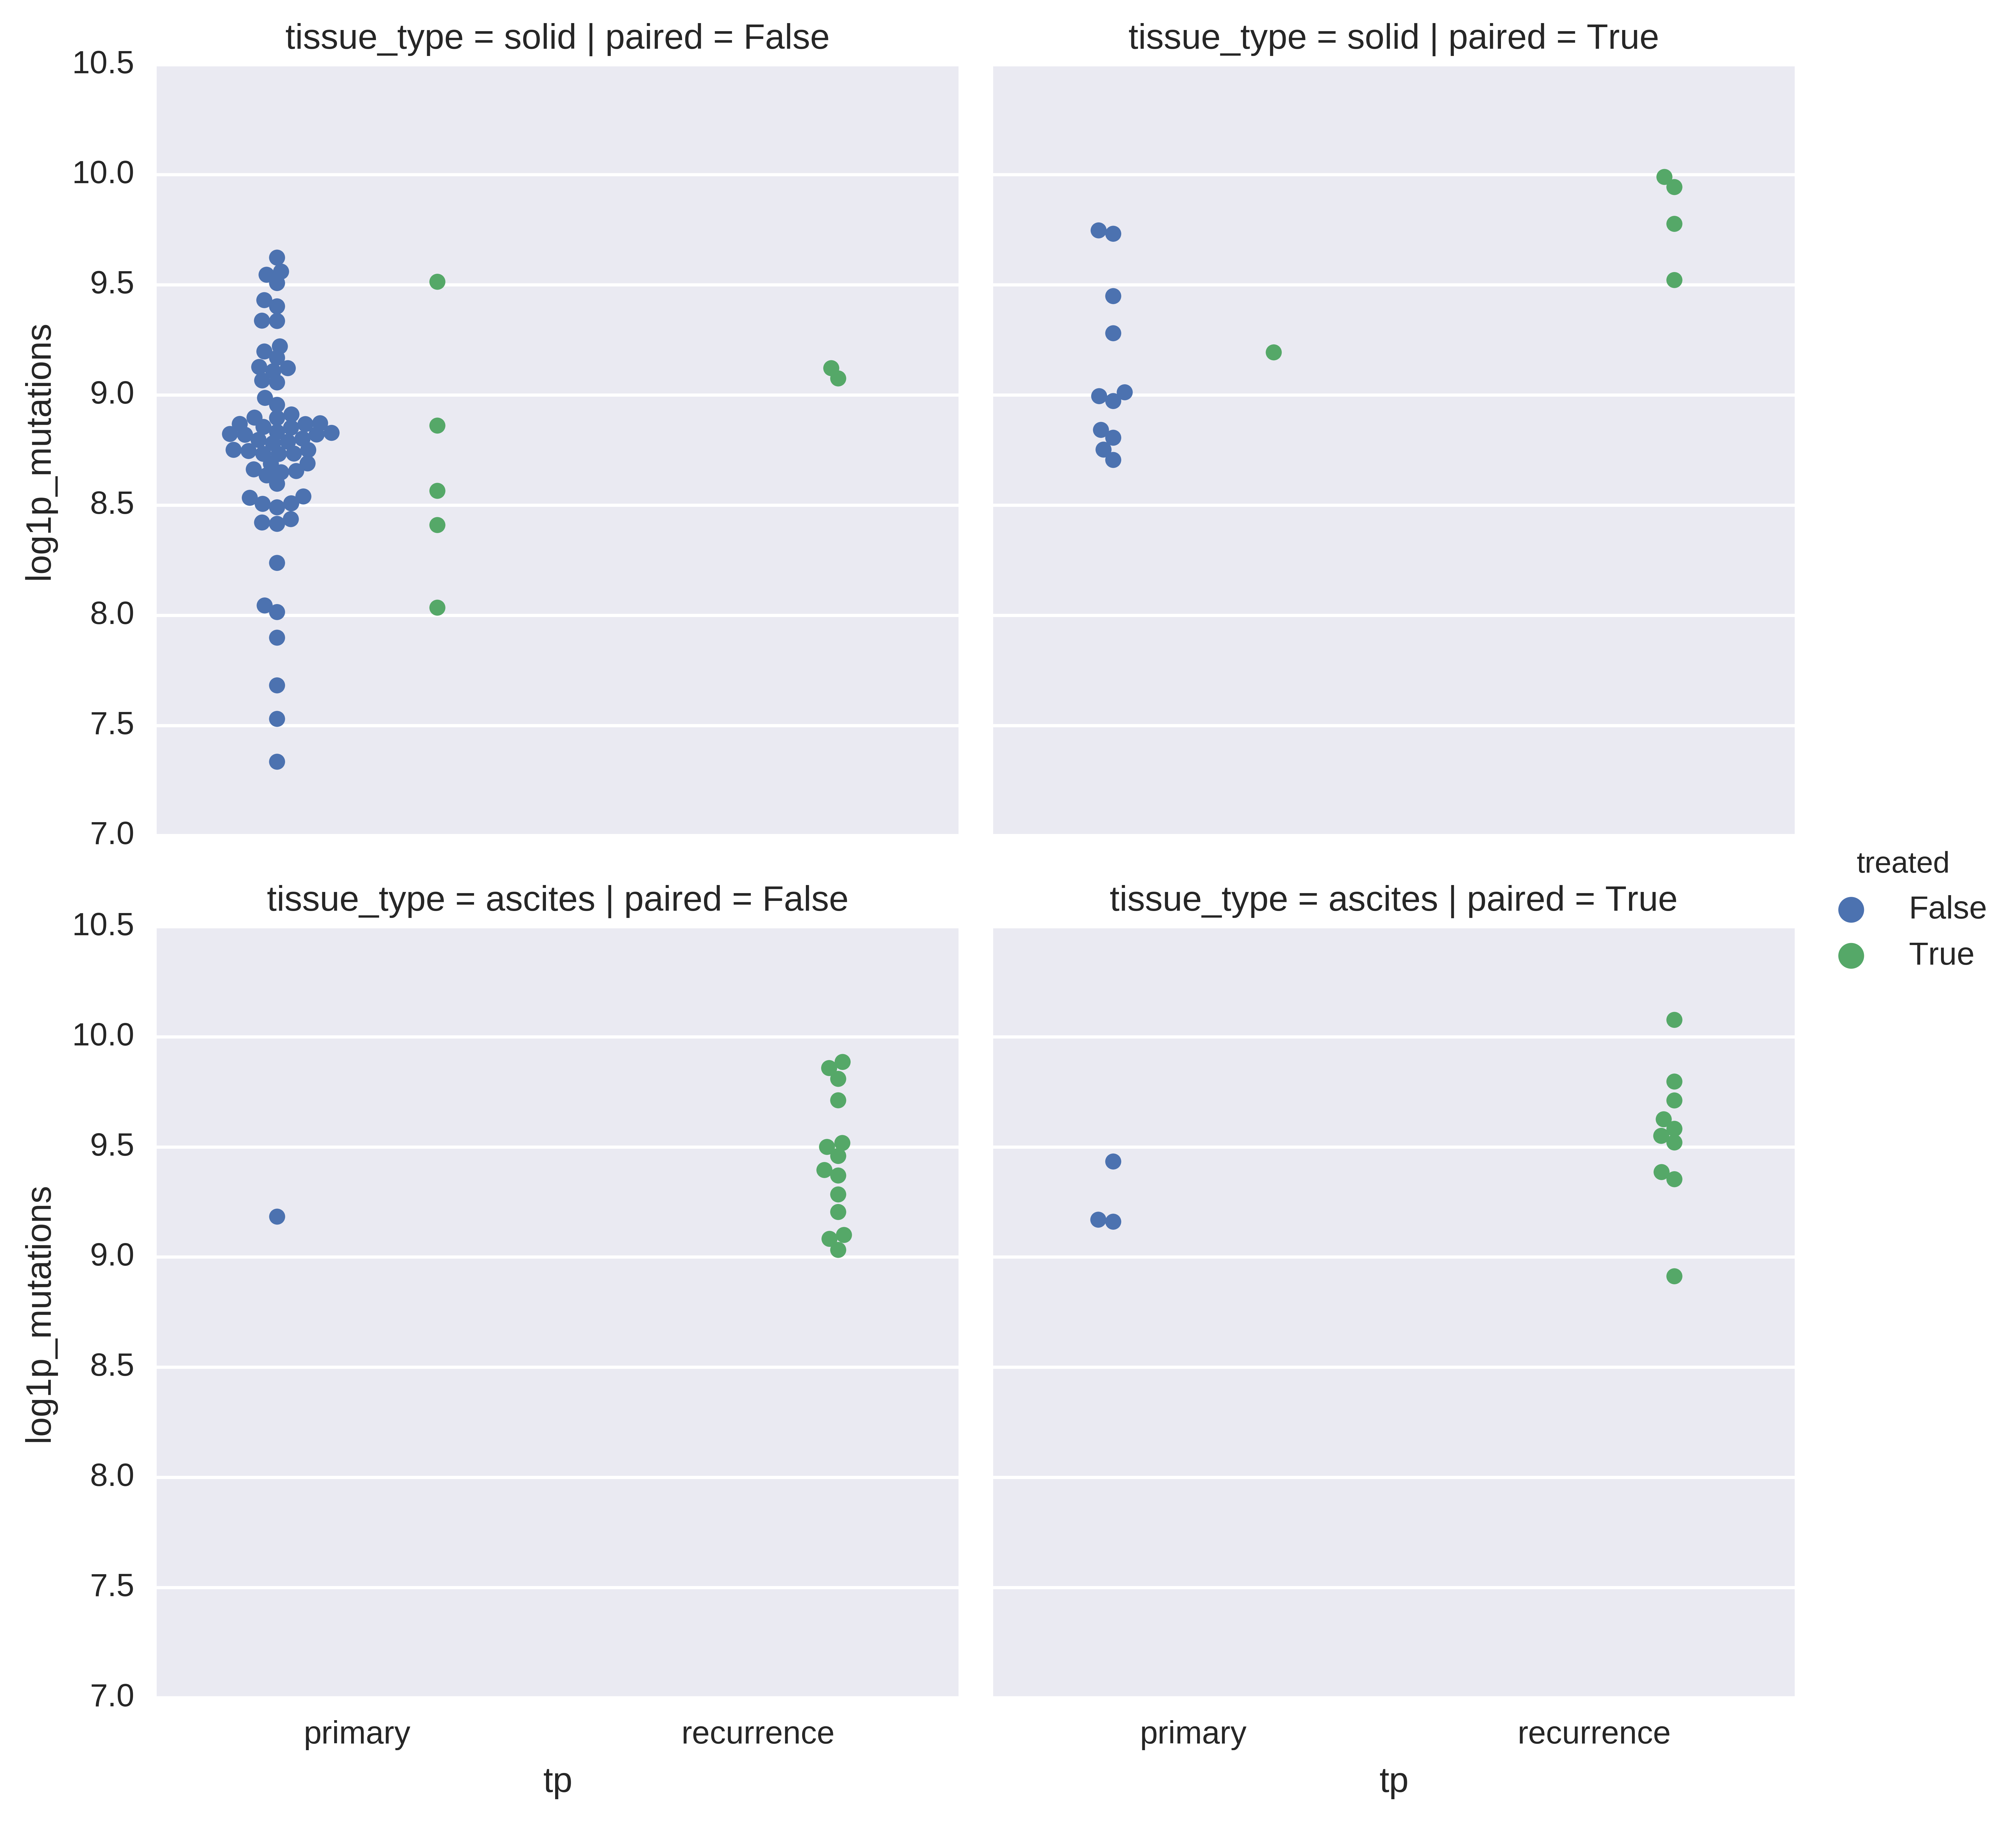

In [11]:
seaborn.factorplot(data = df,
                   x = 'tp', y = 'log1p_mutations',
                   hue = 'treated',
                   kind = 'swarm',
                   split = True,
                   col = 'paired',
                   row = 'tissue_type'
                  )


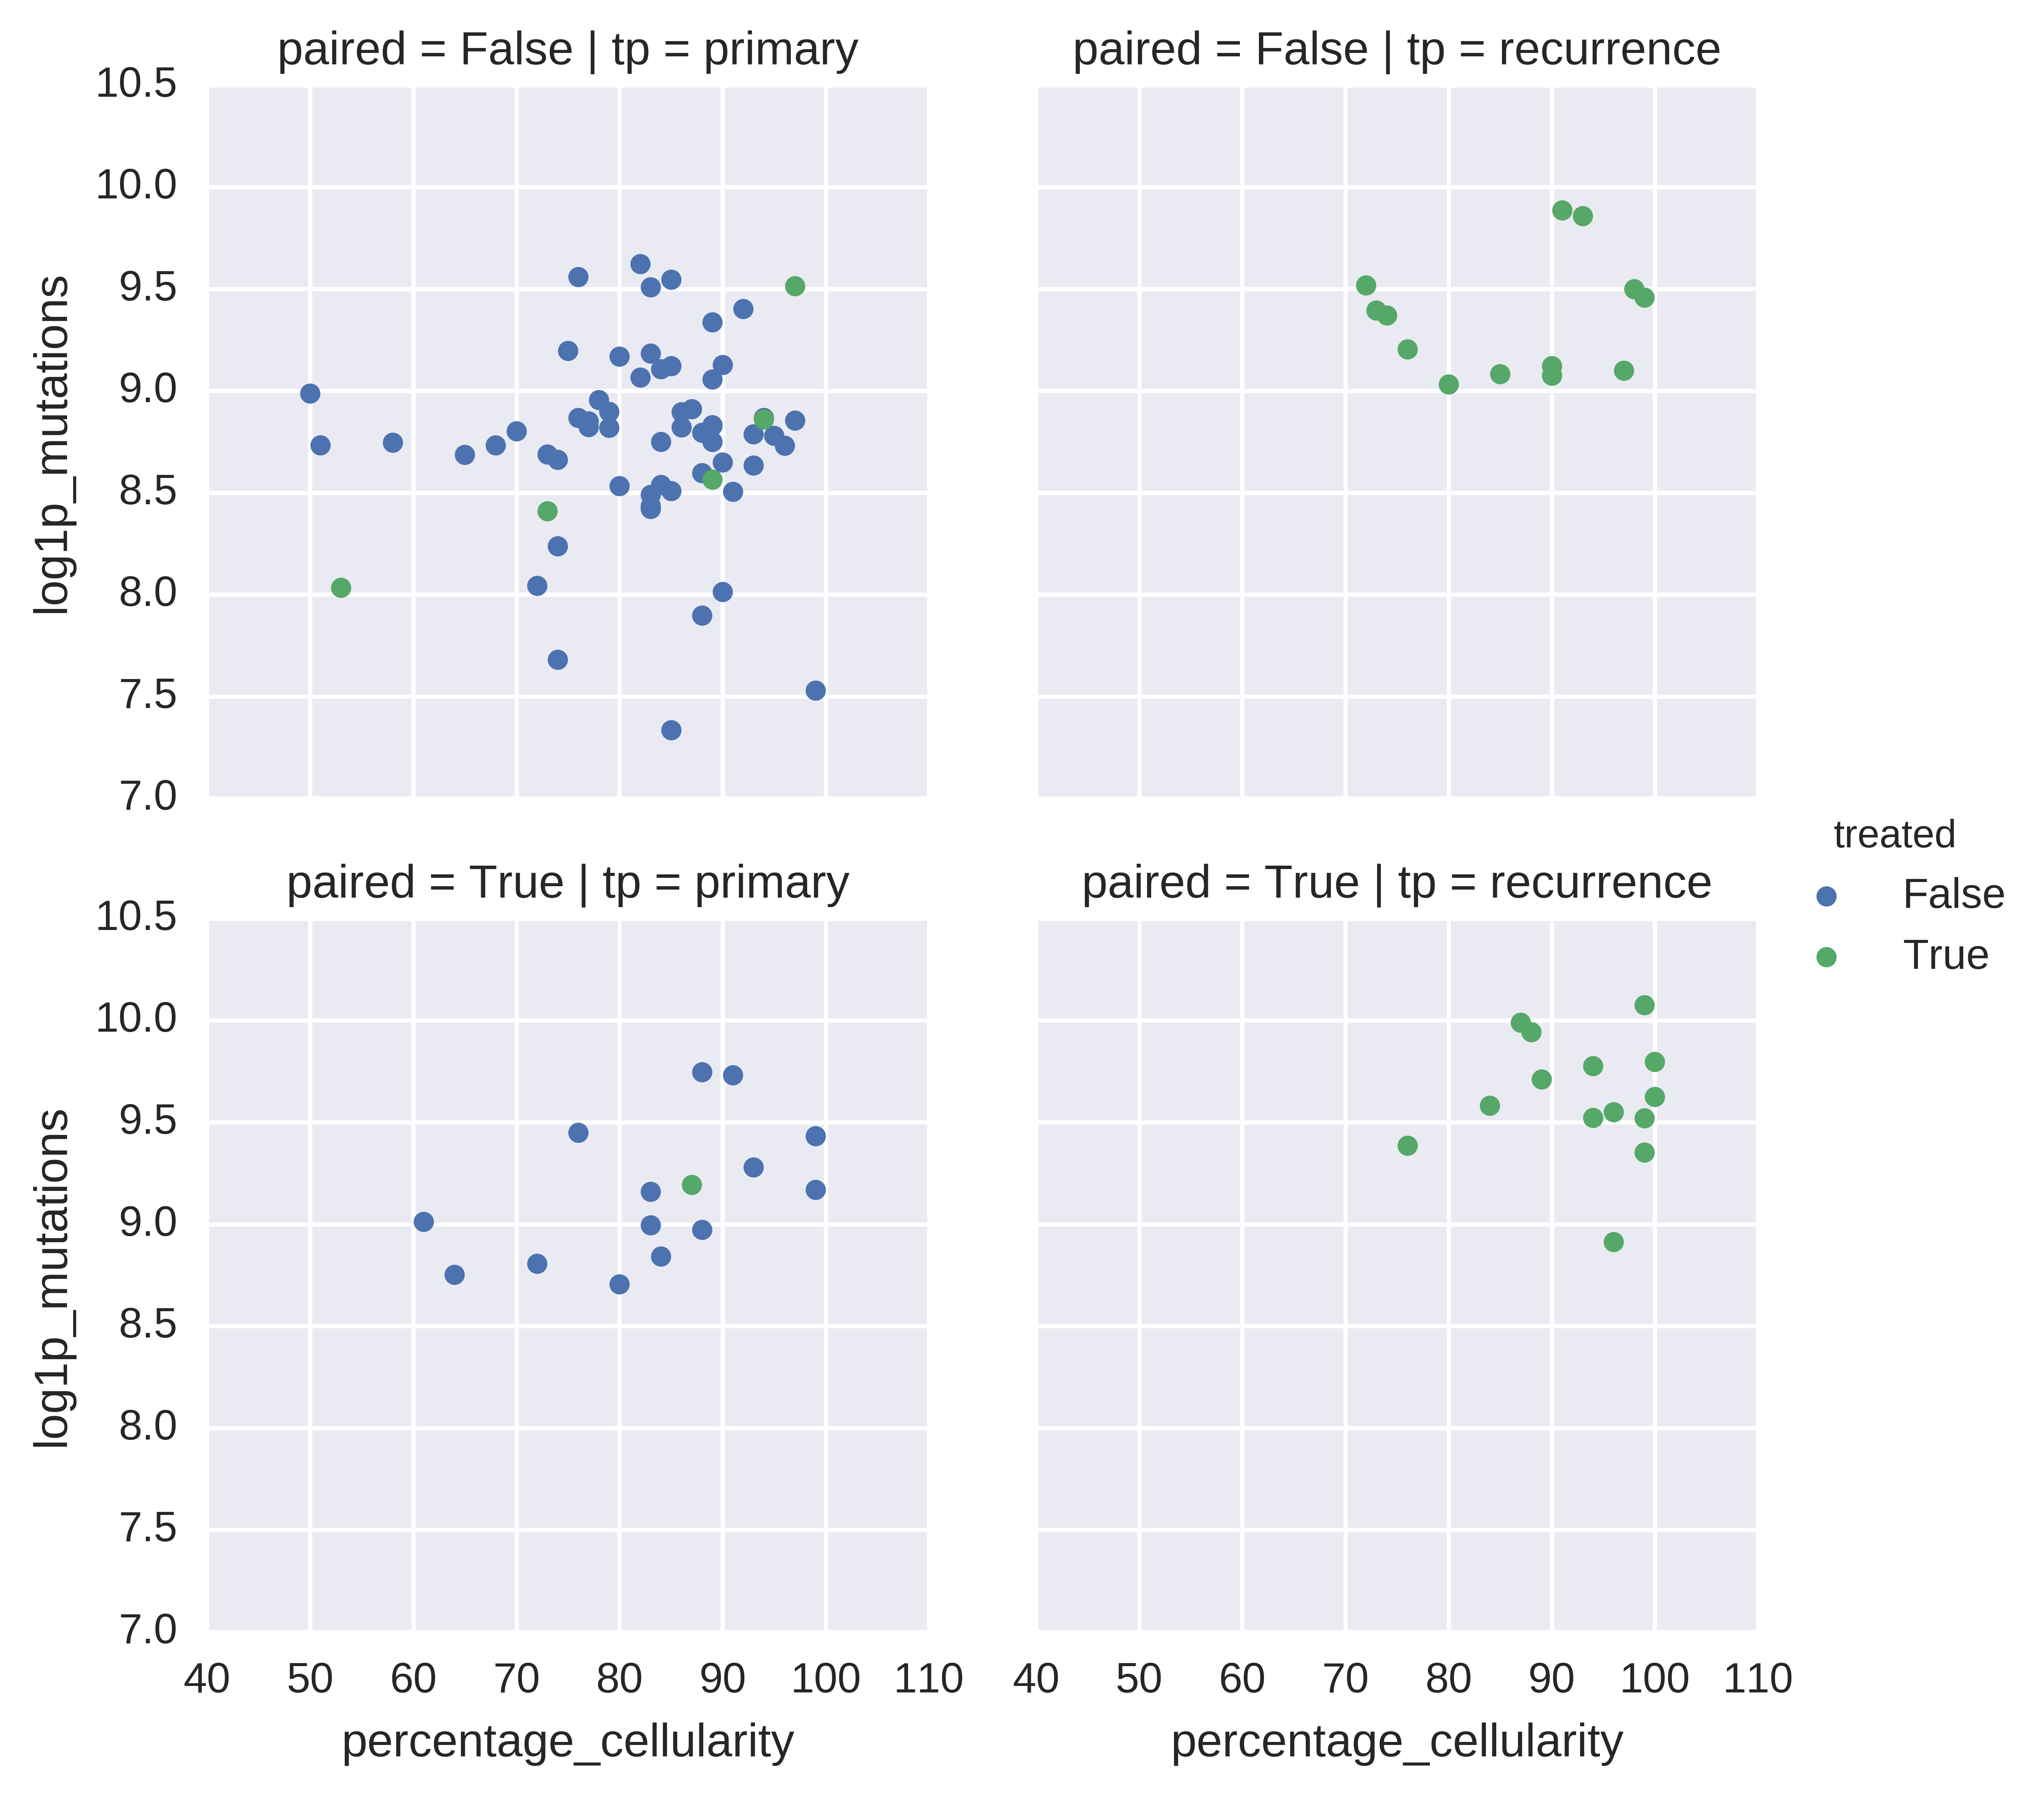

In [12]:
g = seaborn.FacetGrid(data = df, row = 'paired', col = 'tp', hue = 'treated')
g.map(pyplot.scatter, 'percentage_cellularity', 'log1p_mutations')
g.add_legend()

### mutation count among paired samples 

In [13]:
tmpd = df.query('paired == True').copy()
tmpd['recurrence'] = (tmpd.timepoint == 'recurrence').astype(int)
tmpd['donor_id'] = tmpd.donor.astype('category').values.codes
tmpd.head()

Unnamed: 0     index     donor cohort library treated  \
source_id                                                                     
AOCS-034-13/SP101524           4  SP101524  AOCS-034   AOCS     WGS    True   
AOCS-034-1/SP101523            5  SP101523  AOCS-034   AOCS     WGS   False   
AOCS-064-13/SP101554          14  SP101554  AOCS-064   AOCS     WGS    True   
AOCS-064-1/SP101552           15  SP101552  AOCS-064   AOCS     WGS   False   
AOCS-065-13/SP101560          16  SP101560  AOCS-065   AOCS     WGS    True   

                       timepoint metastasis tissue_type  interval_days assay  \
source_id                                                                      
AOCS-034-13/SP101524  recurrence      False     ascites         1597.0   WGS   
AOCS-034-1/SP101523      primary      False       solid            0.0   WGS   
AOCS-064-13/SP101554  recurrence      False     ascites         1301.0   WGS   
AOCS-064-1/SP101552      primary      False       solid            0.0   WGS   
AOCS-065-13/SP101560  recurrence      False     ascites          420.0   WGS   

                     paired timepoint_paired  protein changing  peptides  \
source_id                                                                  
AOCS-034-13/SP101524   True             True             123.0     269.0   
AOCS-034-1/SP101523    True             True              74.0     171.0   
AOCS-064-13/SP101554   True             True             167.0     617.0   
AOCS-064-1/SP101552    True             True             129.0     435.0   
AOCS-065-13/SP101560   True             True              49.0     118.0   

                      expressed peptides  mutations  mutations_per_mb  indel  \
source_id                                                                      
AOCS-034-13/SP101524               138.0    13626.0          4.538974    5.0   
AOCS-034-1/SP101523                 68.0     6913.0          2.302798    4.0   
AOCS-064-13/SP101554               297.0    23773.0          7.919054   19.0   
AOCS-064-1/SP101552                 99.0    16841.0          5.609927   13.0   
AOCS-065-13/SP101560                70.0     7423.0          2.472685    3.0   

                      interesting mutations         group        treatment  \
source_id                                                                    
AOCS-034-13/SP101524              17.906943  AOCS ascites    chemo treated   
AOCS-034-1/SP101523               18.429047    AOCS solid  treatment naive   
AOCS-064-13/SP101554              21.040676  AOCS ascites    chemo treated   
AOCS-064-1/SP101552               22.837124    AOCS solid  treatment naive   
AOCS-065-13/SP101560              20.342180  AOCS ascites    chemo treated   

                      fraction_peptides_expressed project_code  \
source_id                                                        
AOCS-034-13/SP101524                     0.513011        OV-AU   
AOCS-034-1/SP101523                      0.397661        OV-AU   
AOCS-064-13/SP101554                     0.481361        OV-AU   
AOCS-064-1/SP101552                      0.227586        OV-AU   
AOCS-065-13/SP101560                     0.593220        OV-AU   

                     study_specimen_involved_in submitted_specimen_id  \
source_id                                                               
AOCS-034-13/SP101524                        NaN           AOCS-034-13   
AOCS-034-1/SP101523                       PCAWG            AOCS-034-1   
AOCS-064-13/SP101554                        NaN           AOCS-064-13   
AOCS-064-1/SP101552                       PCAWG            AOCS-064-1   
AOCS-065-13/SP101560                        NaN           AOCS-065-13   

                     icgc_donor_id submitted_donor_id  \
source_id                                               
AOCS-034-13/SP101524       DO46329           AOCS-034   
AOCS-034-1/SP101523        DO46329           AOCS-034   
AOCS-064-13/SP101554       DO46342           AOCS-064   
AOCS-0

In [14]:
## doesn't work - yields "local variable x referenced before assignment' error
#seaborn.tsplot(data = tmpd,
#               time = 'tp', 
#               value = 'mutations', 
#               unit = 'donor',
#               interpolate = True
#              )

## look at all outcomes

### first attempt - long version of data

In [26]:
df2 = df.reset_index().copy()
except_predicted = [col for col in df2.columns if col not in predicted]

In [30]:
dflong = pandas.melt(df2, 
                     id_vars = except_predicted,
                     value_vars = predicted, 
                     var_name='outcome_var', 
                     value_name='y'
                    )
dflong.head()

source_id  Unnamed: 0     index     donor cohort library  \
0   AOCS-001-1/SP101515           0  SP101515  AOCS-001   AOCS     WGS   
1   AOCS-002-1/SP101517           1  SP101517  AOCS-002   AOCS     WGS   
2   AOCS-004-1/SP101519           2  SP101519  AOCS-004   AOCS     WGS   
3   AOCS-005-1/SP101521           3  SP101521  AOCS-005   AOCS     WGS   
4  AOCS-034-13/SP101524           4  SP101524  AOCS-034   AOCS     WGS   

  treated   timepoint metastasis tissue_type  interval_days assay paired  \
0   False     primary      False       solid            0.0   WGS  False   
1   False     primary      False       solid            0.0   WGS  False   
2   False     primary      False       solid            0.0   WGS  False   
3   False     primary      False       solid            0.0   WGS  False   
4    True  recurrence      False     ascites         1597.0   WGS   True   

  timepoint_paired  protein changing  mutations_per_mb  indel  \
0            False              50.0          1.977682    1.0   
1            False              11.0          0.510326    0.0   
2            False              57.0          2.260493    1.0   
3            False              39.0          1.899734    2.0   
4             True             123.0          4.538974    5.0   

   interesting mutations         group        treatment  \
0              19.302678    AOCS solid  treatment naive   
1              17.297650    AOCS solid  treatment naive   
2              16.931919    AOCS solid  treatment naive   
3              15.640891    AOCS solid  treatment naive   
4              17.906943  AOCS ascites    chemo treated   

   fraction_peptides_expressed project_code study_specimen_involved_in  \
0                     0.554688        OV-AU                      PCAWG   
1                          NaN        OV-AU                      PCAWG   
2                     0.344828        OV-AU                      PCAWG   
3                     0.639344        OV-AU                      PCAWG   
4                     0.513011        OV-AU                        NaN   

  submitted_specimen_id icgc_donor_id submitted_donor_id  \
0            AOCS-001-1       DO46325           AOCS-001   
1            AOCS-002-1       DO46326           AOCS-002   
2            AOCS-004-1       DO46327           AOCS-004   
3            AOCS-005-1       DO46328           AOCS-005   
4           AOCS-034-13       DO46329           AOCS-034   

                   specimen_type      specimen_type_other  specimen_interval  \
0  Primary tumour - solid tissue                      NaN                  0   
1  Primary tumour - solid tissue                      NaN                  0   
2  Primary tumour - solid tissue                      NaN                  0   
3  Primary tumour - solid tissue                      NaN                  0   
4       Recurrent tumour - other  recurrent ascitic fluid               1597   

  specimen_donor_treatment_type specimen_donor_treatment_type_other  \
0                  no treatment                                 NaN   
1                  no treatment                                 NaN   
2                  no treatment                                 NaN   
3                  no treatment                                 NaN   
4                 other therapy            Surgery and Chemotherapy   

  specimen_processing     specimen_storage tumour_confirmed  \
0               fresh  frozen, vapor phase               no   
1               fresh  frozen, vapor phase               no   
2               fresh  frozen, vapor phase               no   
3               fresh  frozen, vapor phase               no   
4               fresh  frozen, vapor phase               no   

  tumour_histological_type tumour_grading_system  tumour_grade  \
0                   8441/3            Silverberg           3.0   
1                   8441/3            Silverberg           2.0   
2                   8441/3            Silverberg           3.0   
3        

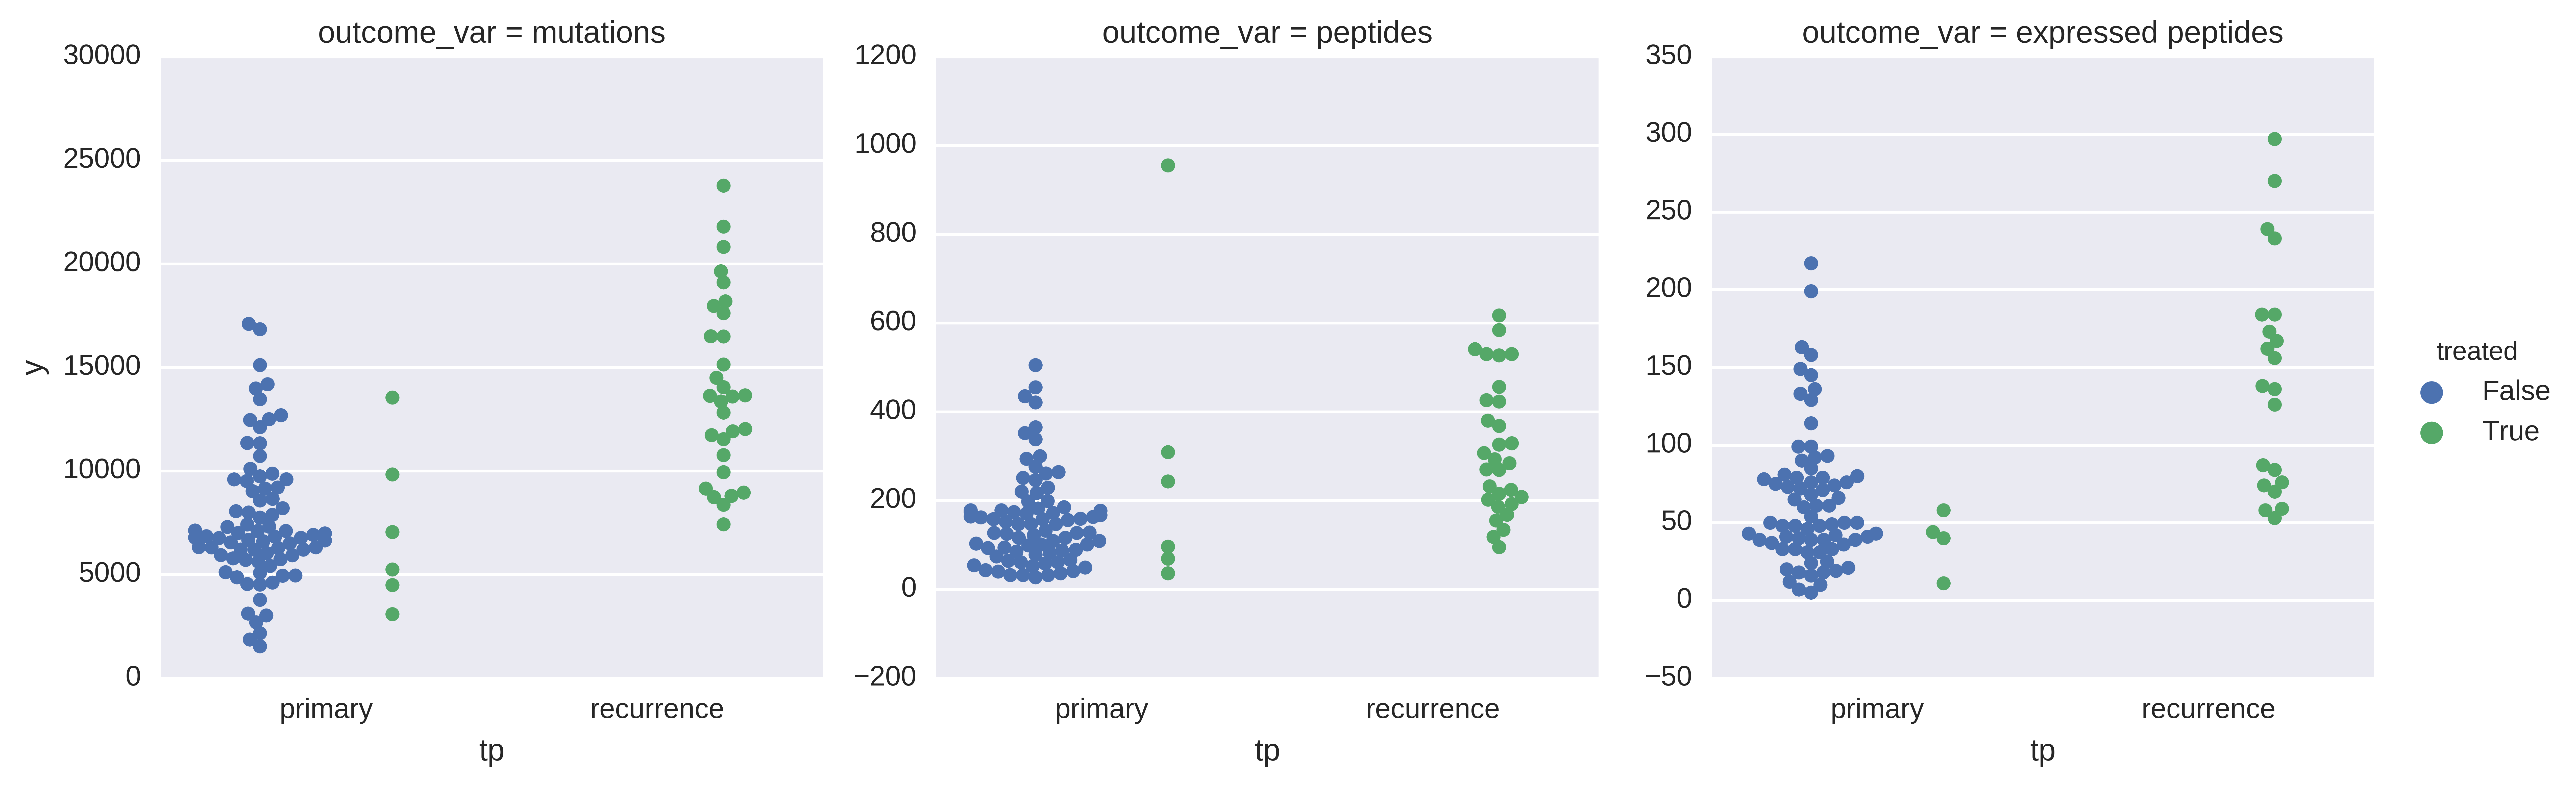

In [36]:
seaborn.factorplot(data = dflong,
                   x = 'tp', y = 'y',
                   hue = 'treated',
                   kind = 'swarm',
                   split = True,
                   col = 'outcome_var',
                   sharey = False
                  )

### second attempt - comparing paired vs unpaired samples

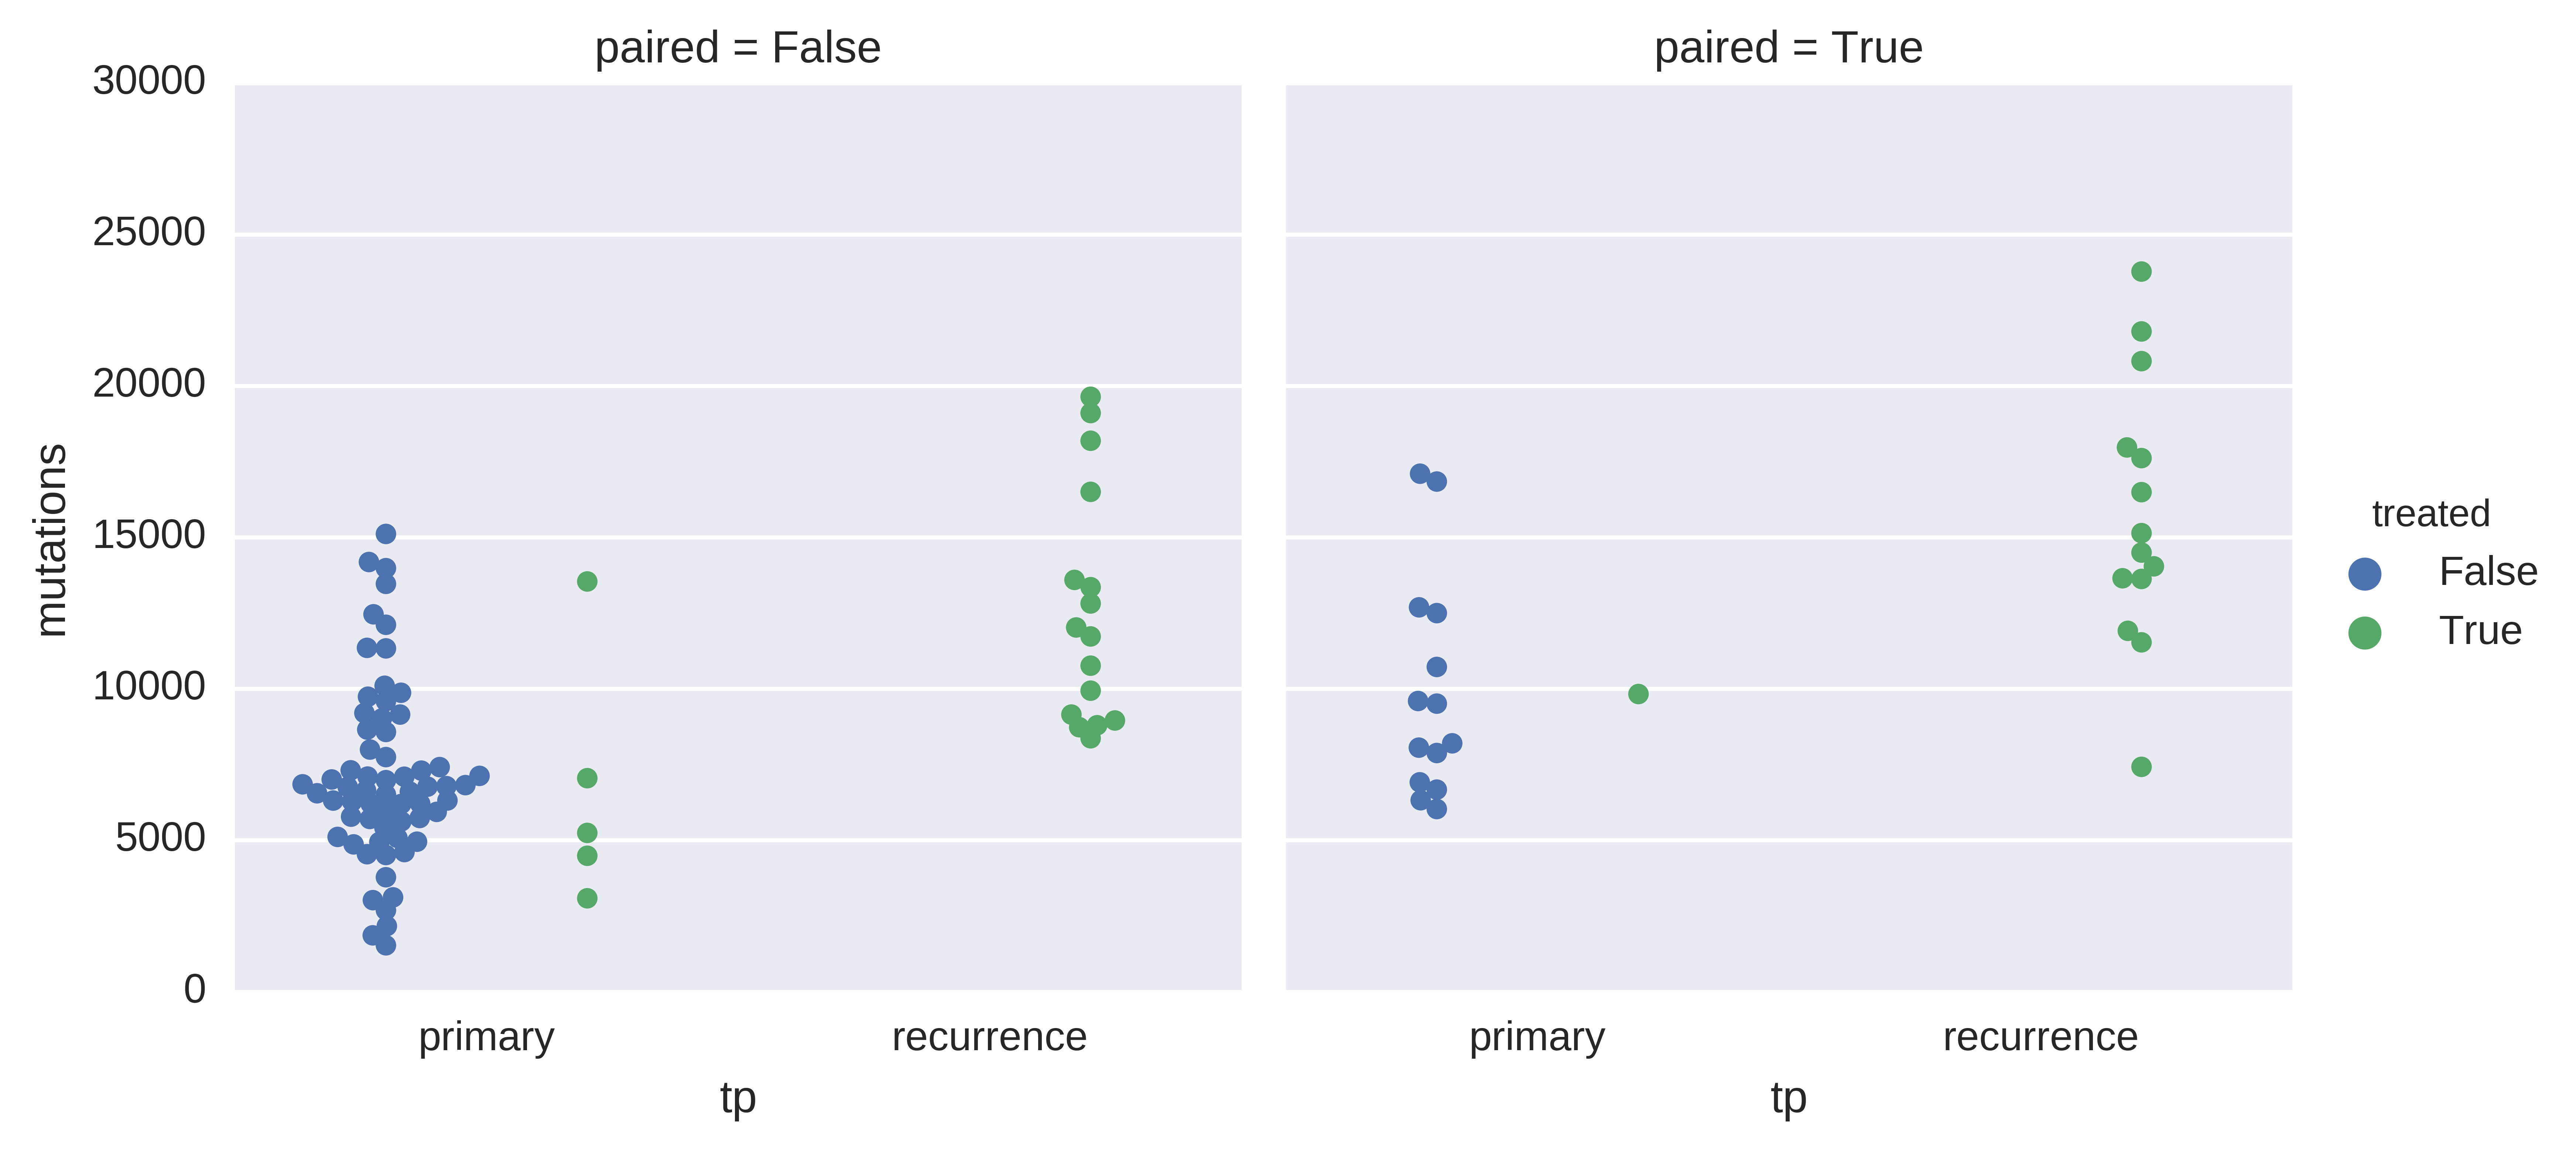

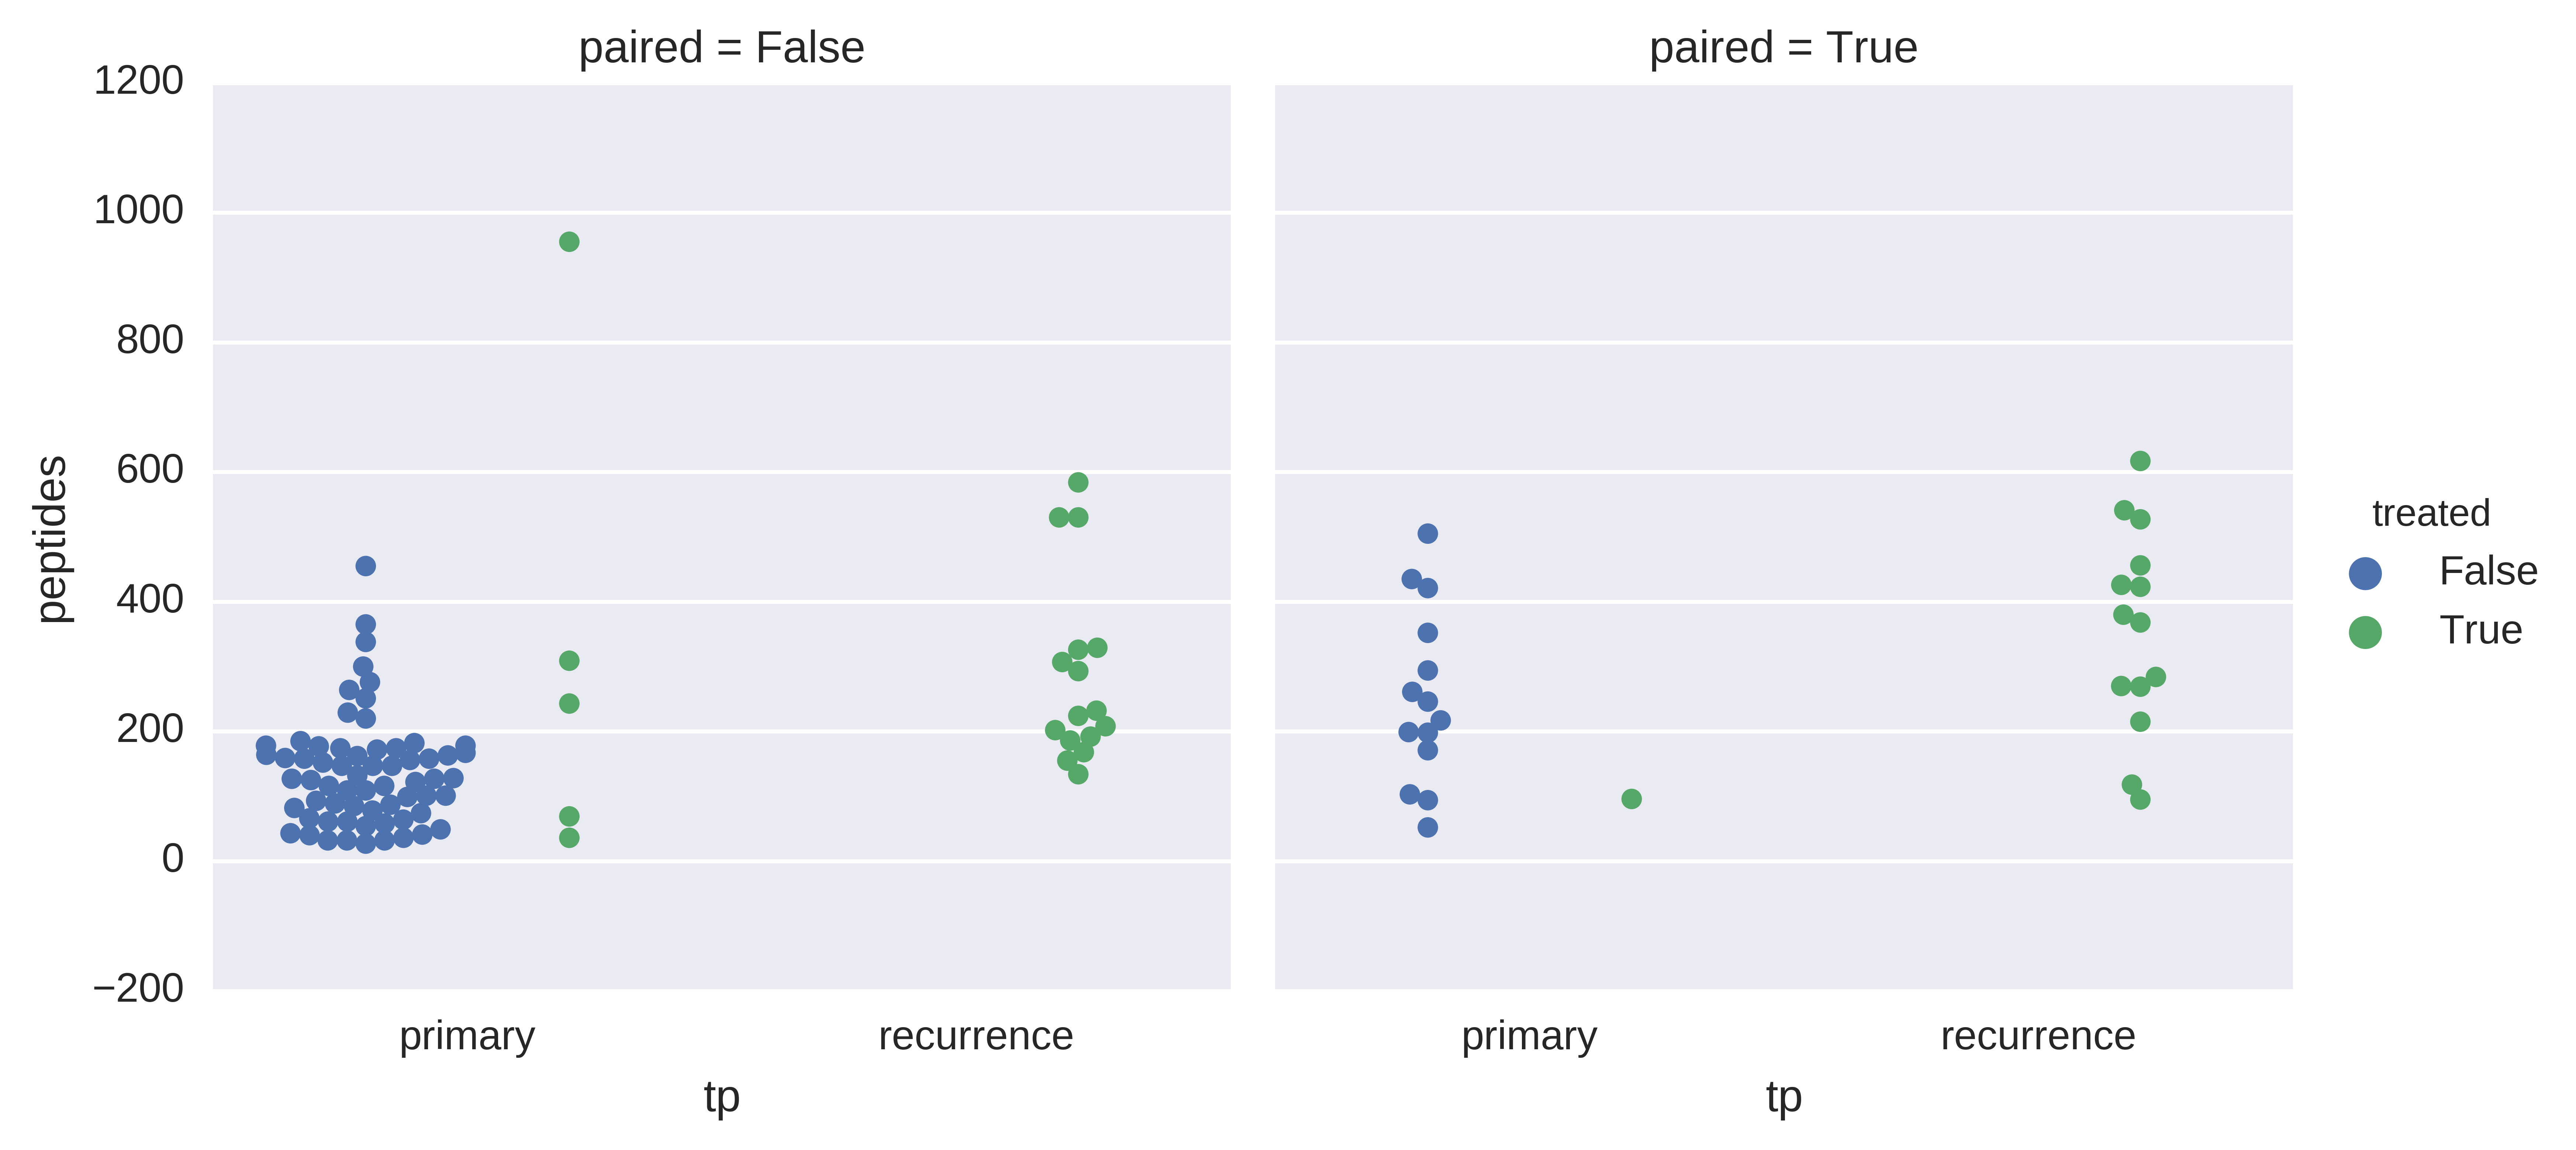

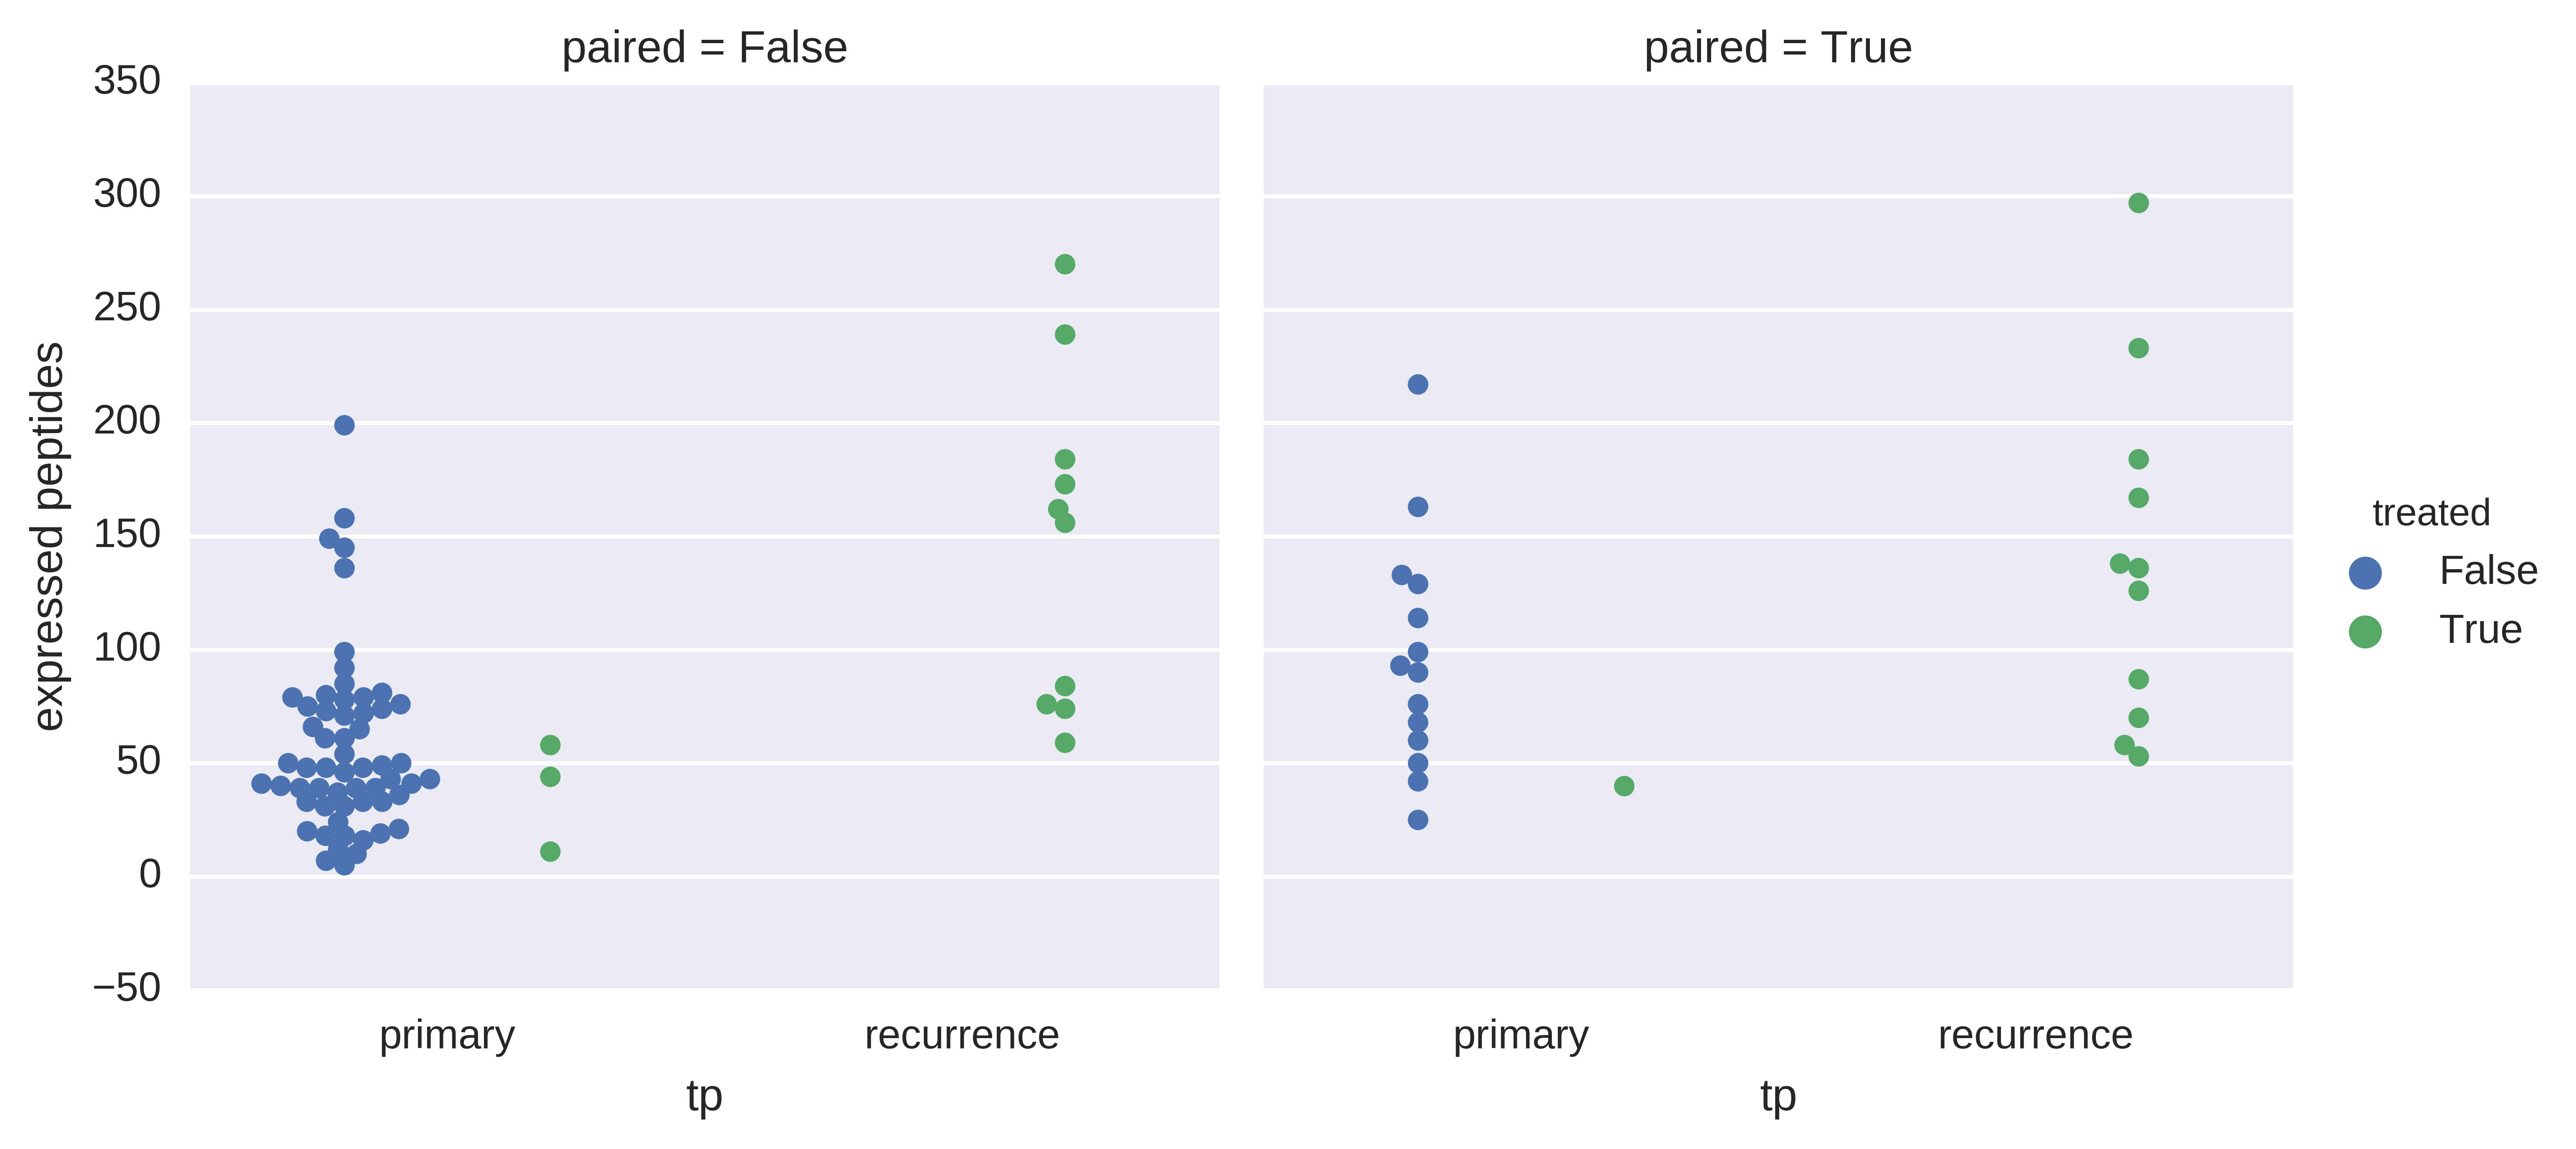

In [48]:

## for some reason, doing this as a for-loop causes an error :/

y_label = 'mutations'
pyplot.figure()
seaborn.factorplot(data = df,
                   x = 'tp',
                   y = y_label,
                   hue = 'treated',
                   kind = 'swarm',
                   col = 'paired',
                   split = True,
                  )

y_label = 'peptides'
pyplot.figure()
seaborn.factorplot(data = df,
                   x = 'tp',
                   y = y_label,
                   hue = 'treated',
                   kind = 'swarm',
                   col = 'paired',
                   split = True,
                  )

y_label = 'expressed peptides'
pyplot.figure()
seaborn.factorplot(data = df,
                   x = 'tp',
                   y = y_label,
                   hue = 'treated',
                   kind = 'swarm',
                   col = 'paired',
                   split = True,
                  )

